# NBACK_CLASSIFICATION BRANCH 
- 2-back classify same(1) or different(2). 
- 2 stimuli, 30 trials per episode
    - NB more than 2 stimuli makes "different" more likely

In [30]:
from glob import glob as glob
import numpy as np
from nback import *

from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%reload_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### nback_trainsave.py

In [38]:
# ## NBACK_CLASSIFICATION BRANCH 

# import numpy as np
# from nback import *

# cell_size = 30
# depth = 40
# num_stim = 10
# numback = 10

# NUM_EPOCHS = 10000
# EPOCHS_PER_SESSION = 5000 

# # initialize
# ML = MetaLearner(cell_size,depth=depth,num_stim=num_stim,preunroll=numback)
# trainer = Trainer(ML,numback)

# # train
# train_loss,train_acc = trainer.train_loop(NUM_EPOCHS,EPOCHS_PER_SESSION)

# # save
# model_dir = 'models/sweep_N/state_%i-depth_%i-numstim_%i-nback_%i/'%(cell_size,depth,num_stim,numback)
# ML.saver_op.save(ML.sess,model_dir+'final')
# np.save(model_dir+'train_loss',train_loss)
# np.save(model_dir+'train_acc',train_loss)


# load and plot

In [62]:
cell_size = 30
depth = 40
numstim = 20
numback = 2
model_dir = 'models/sweep_N/state_%i-depth_%i-numstim_%i-nback_%i/'%(cell_size,depth,numstim,numback)

In [64]:
train_acc = np.load(model_dir+'train_acc.npy')
train_loss = np.load(model_dir+'train_loss.npy')
train_acc.shape,train_loss.shape

((2000,), (2000,))

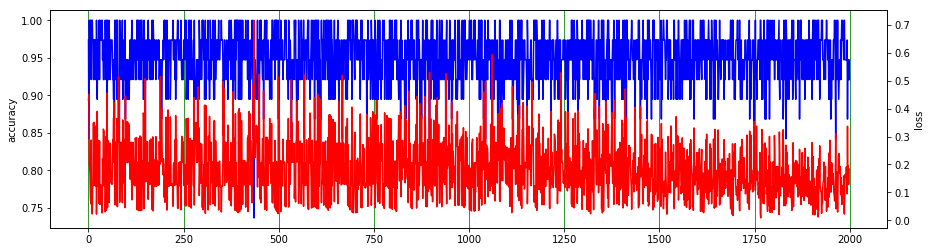

In [65]:
plt.figure(figsize=(15,4))
ax1 = plt.gca()
ax1.plot(train_acc,c='b')
ax1.set_ylabel('accuracy')
ax2 = ax1.twinx()
ax2.plot(train_loss,c='r')
ax2.set_ylabel('loss')
# ax1.set_xticks(np.arange(0,50001,10000))
ax1.grid(True,c='green',axis='x')

In [108]:
task = NBackTask(numback)
Xdata,Ydata = task.gen_seq(30,2)

In [148]:
loss,acc = trainer.eval_loop(10)

In [149]:
acc

array([14., 18., 14., 29., 29., 15., 23., 29., 13., 13.])

In [137]:
trainer.net.sess.run(trainer.net.randomize_emat)
loss,yhat,ybatch = trainer.eval_step(Xdata,Ydata)
np.sum(ybatch.argmax(2) == yhat.argmax(2))

12

[autoreload of nback failed: Traceback (most recent call last):
  File "/Users/abeukers/anaconda/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
  File "/Users/abeukers/wd/epm/nback.py", line 207
    eval_loss = self.net.sess.run([self.net.eval_loss,self.net.],feed_dict)
                                                               ^
SyntaxError: invalid syntax
]


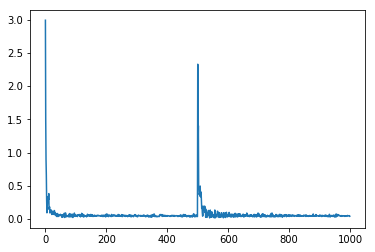

In [54]:
plt.plot(train_loss)

In [ ]:
tf.